In [16]:
!pip install pytubefix
!pip install moviepy
!pip install -U openai-whisper
!pip install ffmpeg
!pip install setuptools-rust

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.5/800.5 kB 8.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.4/209.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 49.4 MB/s eta 0:00:00
  Created wheel for openai-whisper: filename=openai_whisper-20240930-py3-none-any.whl size=803321 sha256=55fd2be62cc1cf8e1199d73e933223905aed551c35e7f4fb6c49438621bb61d7
  Stored in directory: /root/.cache/pip/wheels/dd/4a/1f/d1c4bf3b9133c8168fe617ed979cab7b14fe381d059ffb9d83
Successfully built openai-whisper
  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=9e450b3eba5ed5ae8879c004dfd752b33238350890509034a7025e1cfabdb9b1
  Stored in directory: /root/.cache/pip/wheels/8e

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3070, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2863, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_in

In [1]:
from pytubefix import YouTube

video_link="https://www.youtube.com/watch?v=sHWsE1WnfyA"

try:
    yt = YouTube(video_link)
except:
    print("Connection Error")

stream = yt.streams.filter(res="360p").first()
stream.download("./Downloads/")

# This downloads the mp4 video in the specified path.

'/content/Downloads/K Annamalai On PM Modi NDAs Chances & Why Jayalalitha Was A Much Superior Hindu.mp4'

In [2]:
import moviepy.editor
video = moviepy.editor.VideoFileClip("./Downloads/K Annamalai On PM Modi NDAs Chances & Why Jayalalitha Was A Much Superior Hindu.mp4")
audio = video.audio
audio.write_audiofile("audio_file.mp3")

MoviePy - Writing audio in audio_file.mp3


MoviePy - Done.


In [3]:
import torch
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
import whisper

model = whisper.load_model("base", DEVICE)
# Whisper Base model was used for transcription

result = model.transcribe("audio_file.mp3")
# result variable stores transcription and segment information of the audio.

100%|███████████████████████████████████████| 139M/139M [00:02<00:00, 55.6MiB/s]
  checkpoint = torch.load(fp, map_location=device)

  warnings.warn("FP16 is not supported on CPU; using FP32 instead")



In [5]:
segments=[]
data=[]
for i in result["segments"]:
    segments.append(i['text'])
    data.append([i["id"], i['start'], i['end'], i['text']])

# This stores the information regarding segmentation performed by Whisper Base Model

In [6]:
data[:10] # The first 10 segments broken by Whisper model can be visualised.

[[0,
  0.0,
  2.88,
  ' Shall I start off by wishing you a happy birthday in advance?'],
 [1, 2.88, 3.88, ' Thank you sir.'],
 [2, 3.88, 6.48, ' So we can, two weeks in advance.'],
 [3,
  6.48,
  10.44,
  ' We can only offer you words, but do you think the people of Coembatore are going to'],
 [4, 10.44, 12.44, ' offer you more than words?'],
 [5,
  12.44,
  19.8,
  ' Yes, all elections are, you have to wait till the counting to know what people have decided.'],
 [6,
  19.8,
  24.48,
  ' But having said it, I always believe in election, you do your best and during the course of'],
 [7,
  24.48,
  28.88,
  ' a campaigning, you actually pick up a certain vibration and that is unmistakable.'],
 [8,
  28.88,
  32.44,
  ' An election normally, many a time you know the word it slightly previously sir, because'],
 [9, 32.44, 35.68, " the vibrations and people's body language do not lie."]]

In [7]:
from transformers import BertTokenizer, BertModel
import torch

model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

# BERT Embeddings were used to calculate cosine similarity

def get_bert_embeddings(sentences):
    encoded = tokenizer.batch_encode_plus(sentences, add_special_tokens=True, padding='longest', return_tensors='pt')
    input_ids = encoded['input_ids']

    with torch.no_grad():
        outputs = model(input_ids)
        last_hidden_state = outputs[0]
    sentence_embeddings = torch.mean(last_hidden_state, dim=1)

    return sentence_embeddings

embeddings = get_bert_embeddings(segments)

The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(



tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

  warnings.warn(



model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


In [8]:
import torch
from scipy.spatial.distance import cdist

cosine_similarities = []
start_time=0
chunk=[[]] # This variable stores all information of text in a chunk
for i in range(len(embeddings)-1):

    # The below code snippet avoids splitting of phrases over chunks. It was observed while splitting when segments started with a lowercase alphabet.
    # When lowercase alphabet is encountered, it is automatically included in the chunk and the similarity score might be lower due to embeddings.

    if(data[i][3][1].islower()):
        if(data[i][2]-start_time<15):
            chunk[len(chunk)-1].append(data[i])
        continue

    # Embeddings are extracted and cosine similarity is calculated between them to get semantic similarity score.

    emb1 = torch.tensor(embeddings[i])
    emb2 = torch.tensor(embeddings[i + 1])
    emb1 = emb1.reshape(1, -1)
    emb2 = emb2.reshape(1, -1)
    cosine_sim = round(1 - cdist(emb1, emb2, metric='cosine')[0][0], 1)

    # This threshold of 0.7 was dynamically chosen after observing the trend of cosine similarity scores, visualized in a graph ahead.

    if(cosine_sim>=0.7):
        if(data[i][2]-start_time<15): # total chunk time is checked everytime before appending the segment into the chunk.
            chunk[len(chunk)-1].append(data[i])
        else:
            start_time=data[i][1]
            chunk.append([])
            chunk[len(chunk)-1].append(data[i])
    else:
        start_time=data[i][1]
        chunk.append([])
        chunk[len(chunk)-1].append(data[i])

    cosine_similarities.append(cosine_sim) # This list stores cosine similarities used for visualization and threshold calculation

chunk.append([data[-1]]) # The final segment is included as a new chunk to avoid longer chunks, this might affect the quality slightly.
# print(len(chunk))

  emb1 = torch.tensor(embeddings[i])

  emb2 = torch.tensor(embeddings[i + 1])



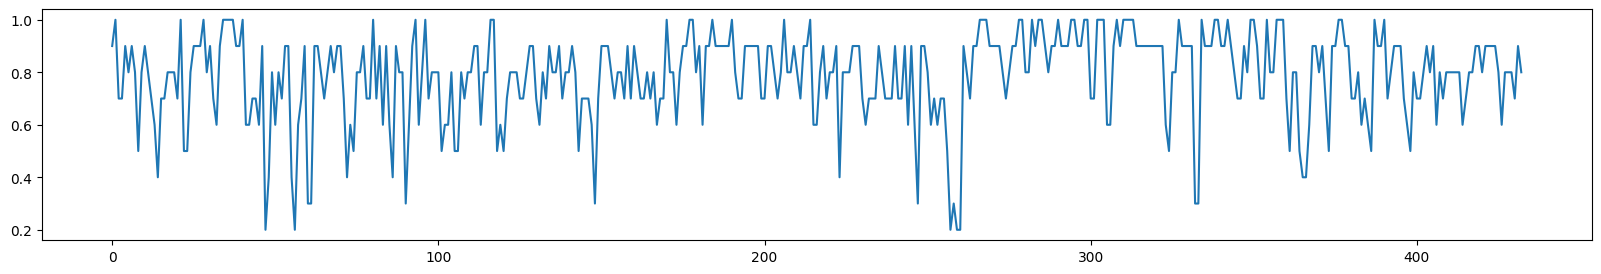

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 3))
plt.plot(cosine_similarities) # This plot helps in choosing the appropriate threshold value
plt.show()

In [10]:
final_chunks=[]

# This snippet helps in storing the chunks in the final format as expected.

for i in range(len(chunk)):
    text=[]
    for e in chunk[i]:
        text.append(e[3])
    final_chunks.append({
        "chunk_id": i+1,
        "chunk_length": round(chunk[i][-1][2]-chunk[i][0][1], 3),
        "text": "".join(text),
        "start_time": round(chunk[i][0][1],3),
        "end_time": round(chunk[i][-1][2],3)
    })

In [11]:
final_chunks[:5] # The first 5 chunks can be visualized

[{'chunk_id': 1,
  'chunk_length': 12.44,
  'text': ' Shall I start off by wishing you a happy birthday in advance? Thank you sir. So we can, two weeks in advance. We can only offer you words, but do you think the people of Coembatore are going to offer you more than words?',
  'start_time': 0.0,
  'end_time': 12.44},
 {'chunk_id': 2,
  'chunk_length': 12.04,
  'text': ' Yes, all elections are, you have to wait till the counting to know what people have decided. But having said it, I always believe in election, you do your best and during the course of',
  'start_time': 12.44,
  'end_time': 24.48},
 {'chunk_id': 3,
  'chunk_length': 10.16,
  'text': " An election normally, many a time you know the word it slightly previously sir, because the vibrations and people's body language do not lie. I think Coembatore we are in for historic verdicts, what I believe as of now.",
  'start_time': 28.88,
  'end_time': 39.04},
 {'chunk_id': 4,
  'chunk_length': 14.96,
  'text': ' I hope it will be a

In [12]:
!pip install -q gradio

In [14]:
# prompt: upgrade gradio to its latest version

!pip install -U gradio


chunk:  79%|███████▉  | 43278/54534 [01:57<01:06, 169.22it/s, now=None]

chunk:  80%|████████  | 43795/54534 [02:00<00:52, 203.43it/s, now=None]

  Using cached gradio-4.44.1-py3-none-any.whl.metadata (15 kB)


chunk:  81%|████████  | 43975/54534 [02:01<00:39, 265.35it/s, now=None]

  Using cached gradio_client-1.3.0-py3-none-any.whl.metadata (7.1 kB)


chunk:  81%|████████  | 44054/54534 [02:01<00:33, 312.12it/s, now=None]

chunk:  82%|████████▏ | 44493/54534 [02:03<00:49, 202.26it/s, now=None]

  Using cached websockets-12.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.6 kB)


chunk:  82%|████████▏ | 44600/54534 [02:03<00:33, 293.86it/s, now=None]

chunk:  82%|████████▏ | 44718/54534 [02:04<00:38, 256.63it/s, now=None]

chunk:  82%|████████▏ | 44845/54534 [02:04<00:33, 286.91it/s, now=None]

chunk:  82%|████████▏ | 44958/54534 [02:05<00:28, 330.93it/s, now=None]

Using cached gradio-4.44.1-py3-none-any.whl (18.1 MB)


chunk:  83%|████████▎ | 45027/54534 [02:05<00:30, 306.97it/s, now=None]

Using cached gradio_client-1.3.0-py3-none-any.whl (318 kB)
Using cached websockets-12.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (130 kB)


chunk:  87%|████████▋ | 47561/54534 [02:17<00:28, 242.57it/s, now=None]

  Attempting uninstall: websockets
    Found existing installation: websockets 13.1
    Uninstalling websockets-13.1:
      Successfully uninstalled websockets-13.1


chunk:  87%|████████▋ | 47671/54534 [02:17<00:26, 258.19it/s, now=None]

  Attempting uninstall: gradio-client
    Found existing installation: gradio_client 0.2.9
    Uninstalling gradio_client-0.2.9:
      Successfully uninstalled gradio_client-0.2.9


chunk:  88%|████████▊ | 47848/54534 [02:18<00:28, 237.24it/s, now=None]

  Attempting uninstall: gradio
    Found existing installation: gradio 3.36.1
    Uninstalling gradio-3.36.1:


chunk:  88%|████████▊ | 47919/54534 [02:18<00:32, 200.88it/s, now=None]

      Successfully uninstalled gradio-3.36.1


chunk:  91%|█████████ | 49412/54534 [02:25<00:18, 277.73it/s, now=None]

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yt-dlp 2024.9.27 requires websockets>=13.0, but you have websockets 12.0 which is incompatible.


chunk:  91%|█████████ | 49669/54534 [02:26<00:20, 236.55it/s, now=None]

In [1]:
# This code snippet wraps the whole code in a Gradio app, where input is a url to the video and output is the transcribed audio broken into chunks.

import gradio as gr
from pytubefix import YouTube
import moviepy.editor
import torch
import whisper
from transformers import BertTokenizer, BertModel
import torch
import torch
from scipy.spatial.distance import cdist

model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

def get_bert_embeddings(sentences):
    encoded = tokenizer.batch_encode_plus(sentences, add_special_tokens=True, padding='longest', return_tensors='pt')
    input_ids = encoded['input_ids']

    with torch.no_grad():
        outputs = model(input_ids)
        last_hidden_state = outputs[0]

    sentence_embeddings = torch.mean(last_hidden_state, dim=1)

    return sentence_embeddings

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")


def process_video_url(url):

    video_link=url
    yt = YouTube(video_link)

    stream = yt.streams.filter(res="360p").first()
    stream.download("Downloads/")

    video = moviepy.editor.VideoFileClip("./Downloads/K Annamalai On PM Modi NDAs Chances & Why Jayalalitha Was A Much Superior Hindu.mp4")
    audio = video.audio
    audio.write_audiofile("audio_file.mp3")

    model = whisper.load_model("base", DEVICE)
    result = model.transcribe("audio_file.mp3")

    segments=[]
    data=[]
    for i in result["segments"]:
        segments.append(i['text'])
        data.append([i["id"], i['start'], i['end'], i['text']])

    embeddings = get_bert_embeddings(segments)

    adjacent_similarities = []
    start_time=0
    chunk=[[]]
    for i in range(len(embeddings)-1):
        if(data[i][3][1].islower()):
            if(data[i][2]-start_time<15):
                chunk[len(chunk)-1].append(data[i])
            continue
        emb1 = torch.tensor(embeddings[i])
        emb2 = torch.tensor(embeddings[i + 1])

        emb1 = emb1.reshape(1, -1)
        emb2 = emb2.reshape(1, -1)
        cosine_sim = round(1 - cdist(emb1, emb2, metric='cosine')[0][0], 1)
        if(cosine_sim>=0.7):
            if(data[i][2]-start_time<15):
                chunk[len(chunk)-1].append(data[i])
            else:
                start_time=data[i][1]
                chunk.append([])
                chunk[len(chunk)-1].append(data[i])
        else:
            start_time=data[i][1]
            chunk.append([])
            chunk[len(chunk)-1].append(data[i])

    adjacent_similarities.append(cosine_sim)

    chunk[-1].append(data[-1])

    final_chunks=[]
    for i in range(len(chunk)):
        text=[]
        for e in chunk[i]:
            text.append(e[3])
        final_chunks.append({
            "chunk_id": i+1,
            "chunk_length": round(chunk[i][-1][2]-chunk[i][0][1], 3),
            "text": "".join(text),
            "start_time": round(chunk[i][0][1],3),
            "end_time": round(chunk[i][-1][2],3)
        })

    return final_chunks

gr.Interface(fn=process_video_url,
             inputs='textbox',
             outputs='textbox').launch(share=True);

The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(

  warnings.warn(



Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://45f1500d4342a09c32.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
